In [1]:
from google.colab import files
uploaded = files.upload()  # Upload the zip file here


Saving archive (2).zip to archive (2).zip


In [3]:
import zipfile
import os

# Extract the uploaded file
with zipfile.ZipFile("archive (2).zip", 'r') as zip_ref:
    zip_ref.extractall("e_waste_data")

# Check folders inside
os.listdir("e_waste_data")


['modified-dataset']

In [4]:
!pip install tensorflow gradio


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.applications.efficientnet import preprocess_input

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


In [7]:
import os

# View top-level folders inside the dataset
os.listdir("e_waste_data")

['modified-dataset']

In [8]:
os.listdir("e_waste_data/modified-dataset")


['train', 'test', 'val']

In [9]:
import tensorflow as tf

img_size = (128, 128)
batch_size = 32

train_path = "e_waste_data/modified-dataset/train"
val_path = "e_waste_data/modified-dataset/val"
test_path = "e_waste_data/modified-dataset/test"


In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path, image_size=img_size, batch_size=batch_size, shuffle=True)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_path, image_size=img_size, batch_size=batch_size, shuffle=True)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_path, image_size=img_size, batch_size=batch_size, shuffle=False)


Found 2400 files belonging to 10 classes.
Found 300 files belonging to 10 classes.
Found 300 files belonging to 10 classes.


In [11]:
base_model = EfficientNetV2B0(include_top=False, input_shape=(128, 128, 3), weights='imagenet')
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(len(train_ds.class_names), activation='softmax')
])


24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_ds, validation_data=val_ds, epochs=10)


Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 75s 751ms/step - accuracy: 0.6691 - loss: 1.1427 - val_accuracy: 0.9333 - val_loss: 0.2157
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 77s 690ms/step - accuracy: 0.9415 - loss: 0.1863 - val_accuracy: 0.9533 - val_loss: 0.1701
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 57s 760ms/step - accuracy: 0.9623 - loss: 0.1267 - val_accuracy: 0.9500 - val_loss: 0.1705
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 75s 665ms/step - accuracy: 0.9672 - loss: 0.1002 - val_accuracy: 0.9567 - val_loss: 0.1566
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 52s 690ms/step - accuracy: 0.9795 - loss: 0.0686 - val_accuracy: 0.9433 - val_loss: 0.1718
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 51s 681ms/step - accuracy: 0.9852 - loss: 0.0561 - val_accuracy: 0.9500 - val_loss: 0.1765
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 86s 739ms/step - accuracy: 0.9843 - loss: 0.0500 - val_accuracy: 0.9500 - val_loss: 0.1543
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 78s 688ms/step - accuracy: 0.9908 - loss: 0.0350 - val_accu

In [13]:
loss, acc = model.evaluate(test_ds)
print(f"Test Accuracy: {acc:.2f}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 564ms/step - accuracy: 0.9196 - loss: 0.2140
Test Accuracy: 0.94


1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
                 precision    recall  f1-score   support

        Battery       0.86      0.83      0.85        30
       Keyboard       1.00      0.90      0.95        30
      Microwave       0.85      0.97      0.91        30
         Mobile       0.97      1.00      0.98        30
          Mouse       1.00      1.00      1.00        30
            PCB       0.90      0.93      0.92        30
         Player       0.93      0.90      0.92        30
        Printer       0.97      1.00      0.98        30
     Television       0.96      0.90      0.93        30
Washing Machine       0.97      0.97      0

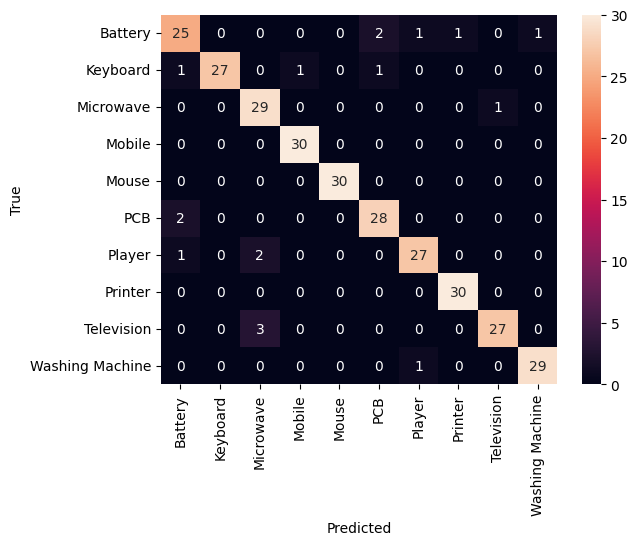

In [14]:
y_pred = []
y_true = []

for images, labels in test_ds:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

print(classification_report(y_true, y_pred, target_names=train_ds.class_names))

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=train_ds.class_names, yticklabels=train_ds.class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
